In [ ]:
# IMPORTS
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper_nn as hnn
import fullyconnected_neuralnetwork as fc_nn

In [ ]:
# LOAD DATASET: example, Fashion-MNIST (28x28 pixels, 1 channel, 10 classes)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('../../../DL_PyTorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('../../../DL_PyTorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
# CHECK DATSET
image, label = next(iter(trainloader))
print(trainset.classes)
hnn.imshow(image[0,:])

In [ ]:
# Have a clear idea of the image tensor shape
# [Batch size, channels, width, height]
image.shape

In [ ]:
# CREATE NETWORK
#input_size = 1*28*28 = 728
input_size = images.size()[1]*image.shape[2]*image.shape[3]
#output_size = 10
output_size = len(trainset.classes)
# Select desired number of hidden layers and their sizes
hidden_sizes = [512, 256, 128]
model = fc_nn.Network(input_size, output_size, hidden_sizes)
criterion = nn.NLLLoss() # Alternatives: nn.CrossEntropyLoss(), nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Alternatives: optim.SGD()

In [ ]:
# TRAIN
fc_nn.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

In [ ]:
# SAVE
filename = 'my_model_checkpoint.pth'
fc_nn.save_model(filename, model, input_size, output_size, hidden_sizes)

In [ ]:
# LOAD
filename = 'my_model_checkpoint.pth'
model = fc_nn.load_model(filename)
print(model)

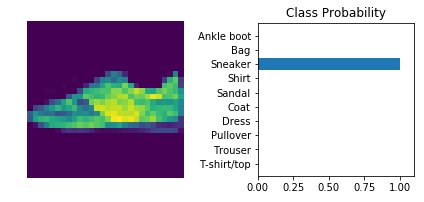

In [8]:
# INFER & VISUALIZE
model.eval()
images, labels = next(iter(testloader))
img = images[0]
#img = img.view(1, 28*28)
img = img.view(1, images.shape[2]*images.shape[3]) # Note: visualization for one channel
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
hnn.view_classify(img.view(1, images.shape[2], images.shape[3]), ps, trainset.classes)